In [10]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

classes = ("General trash", "Paper", "Paper pack", "Metal", "Glass", 
            "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing")

colors = ((255,255,255), (0,0,255), (0,0,122), (0,255,0), (0,122,0), 
            (255,0,0), (122,122,0), (122,0,0), (122,122,122), (0,122,122))

data_dir = '/opt/ml/dataset'

In [11]:
def img_split(path):
    import cv2

    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    tl = img.copy()
    tl[:,512:]=0
    tl[512:,:]=0

    tr = img.copy()
    tr[:,:512]=0
    tr[512:,:]=0

    bl = img.copy()
    bl[:,512:]=0
    bl[:512,:]=0
    
    br = img.copy() 
    br[:,:512]=0
    br[:512,:]=0

    return img, tl, tr, bl, br

In [ ]:
# 이미지 top-left, top-right, bottom-left, bottom-right으로 분할
for img_name in os.listdir(os.path.join(data_dir,'test')):
    if not img_name.startswith('.'):
        img, tl, tr, bl, br = img_split(os.path.join(data_dir,'test',img_name))

        cv2.imwrite(os.path.join(data_dir,'test_top_left',img_name),tl)
        cv2.imwrite(os.path.join(data_dir,'test_top_right',img_name),tr)
        cv2.imwrite(os.path.join(data_dir,'test_bottom_left',img_name),bl)
        cv2.imwrite(os.path.join(data_dir,'test_bottom_right',img_name),br)

In [ ]:
# 분할된 이미지 개수 확인
len([a for a in os.listdir('/opt/ml/dataset/test') if not a.startswith('.')]), len(os.listdir('/opt/ml/dataset/test_top_left')), len(os.listdir('/opt/ml/dataset/test_top_right')), len(os.listdir('/opt/ml/dataset/test_bottom_left')), len(os.listdir('/opt/ml/dataset/test_bottom_right'))

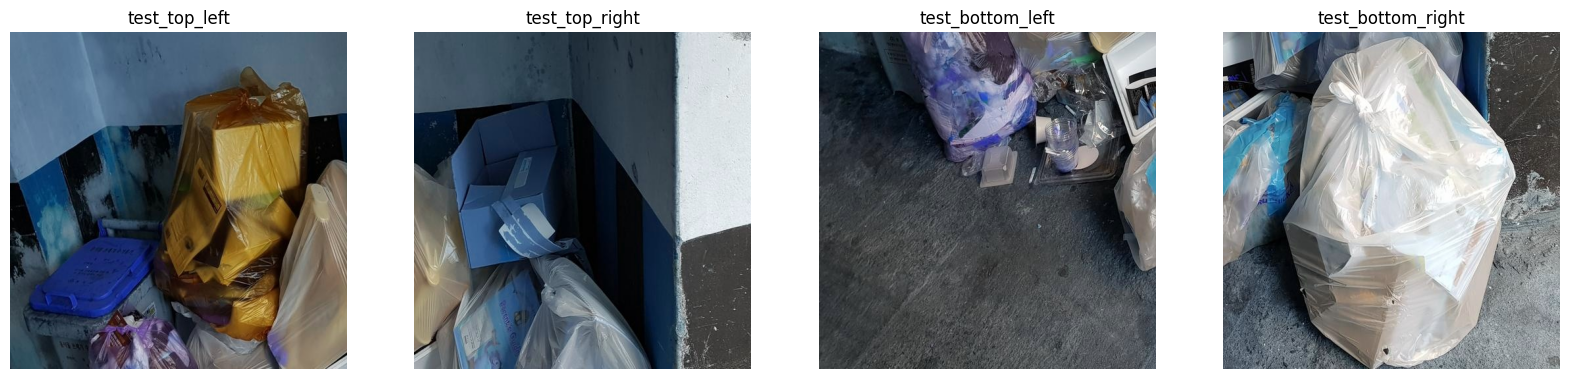

In [9]:
# 분할 됐는지 확인
fig, axes = plt.subplots(1,4,figsize=(20,10))


for i,name in enumerate(('test_top_left','test_top_right','test_bottom_left','test_bottom_right')):
    img = cv2.imread(os.path.join(data_dir,name,'0000.jpg'))
    axes[i].set_title(name)
    axes[i].plot()
    axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[i].axis('off')
